In [1]:
import os
import sys
import json
import pprint #pretty print
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
print sys.version
print "Pandas: ",pd.version.version
from __future__ import division
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

np.random.seed(125)

2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Pandas:  0.16.2


In [3]:
bank_telemarket_df=pd.read_csv("C:/Users/uzh051/training/capitalone-pilottwo/Metis_Project_2/data/bank/bank.csv",sep=';')

In [4]:
print bank_telemarket_df.columns
bank_telemarket_df.head()

Index([u'age', u'job', u'marital', u'education', u'default', u'balance',
       u'housing', u'loan', u'contact', u'day', u'month', u'duration',
       u'campaign', u'pdays', u'previous', u'poutcome', u'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank_telemarket_df=bank_telemarket_df.rename(columns = {'y':'Response'})

In [6]:
bank_telemarket_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
####################################################################################
#Data Type and Sanity Checks
####################################################################################
#Check for null values in movies dataframe
print "Number of rows which are Null by Column Names:\n"
print "\n",len(bank_telemarket_df.index)-bank_telemarket_df.count(),"\n"

Number of rows which are Null by Column Names:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Response     0
dtype: int64 



In [7]:
for column, column_type in bank_telemarket_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)!= 'int64':
        if column<>'age':
            print column,"\n\n",bank_telemarket_df[column].value_counts(),"\n"
        else:
            print column,"\n","Min: ",min(map(int,bank_telemarket_df[column])), "Max: ",max(map(int,bank_telemarket_df[column]))

job 

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
dtype: int64 

marital 

married     27214
single      12790
divorced     5207
dtype: int64 

education 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
dtype: int64 

default 

no     44396
yes      815
dtype: int64 

housing 

yes    25130
no     20081
dtype: int64 

loan 

no     37967
yes     7244
dtype: int64 

contact 

cellular     29285
unknown      13020
telephone     2906
dtype: int64 

month 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
dtype: int64 

poutcome 

unknown    36959
failure     4901
other       1840
success     1511
dtype: int64 

Response 

no     39922
yes 

In [8]:
from sklearn.cross_validation import train_test_split
#df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

cols=[]
for column, column_type in bank_telemarket_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)== 'int64':
        cols.append(column)    
print cols
Y=bank_telemarket_df['Response']
#X=bank_telemarket_df.ix[:,:-1]
X=bank_telemarket_df[cols]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

print len(X_train),len(X_test)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
30291 14920


In [15]:
log_model=LogisticRegression()
log_model.fit(X_train,Y_train)
pd.DataFrame(log_model.predict(X_test),Y_test)
# check the accuracy on the training set
print "Logistic Regression Model Score: ",log_model.score(X_train, Y_train)
print "\n Accuracy Score:\n", metrics.accuracy_score(Y_test, log_model.predict(X_test))
print "\n Confusion Matrix:\n",metrics.confusion_matrix(Y_test, log_model.predict(X_test))
print "\n Classification Report:\n",metrics.classification_report(Y_test, log_model.predict(X_test))


Logistic Regression Model Score:  0.890198408768

 Accuracy Score:
0.885991957105

 Confusion Matrix:
[[12934   201]
 [ 1500   285]]

 Classification Report:
             precision    recall  f1-score   support

         no       0.90      0.98      0.94     13135
        yes       0.59      0.16      0.25      1785

avg / total       0.86      0.89      0.86     14920



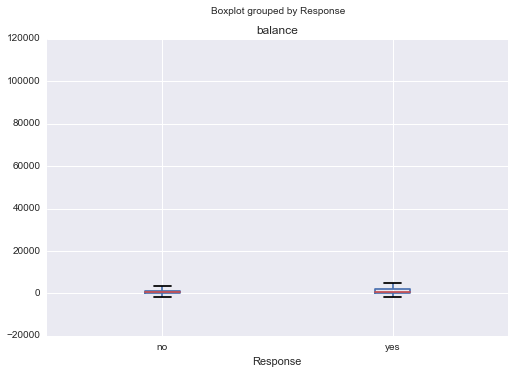

In [12]:
#N = 4
#top_rating = bank_telemarket_df.rating.value_counts().index[:N]

#top_rating_movies = merge_box_critic_df[merge_box_critic_df['rating'].isin(top_rating)]
#top_recent = top_rating_movies[top_rating_movies.year_y >= 1990 ].dropna(subset=['domestic_gross','release_month'])
plot = bank_telemarket_df.boxplot('balance', 'Response')


In [16]:
top_end = bank_telemarket_df['balance'].quantile(np.arange(0.9, 1.01, 0.01)) # Top 10 
top_end

0.90      3574.0
0.91      3864.3
0.92      4260.4
0.93      4687.3
0.94      5134.6
0.95      5768.0
0.96      6572.6
0.97      7777.9
0.98      9439.4
0.99     13164.9
1.00    102127.0
dtype: float64

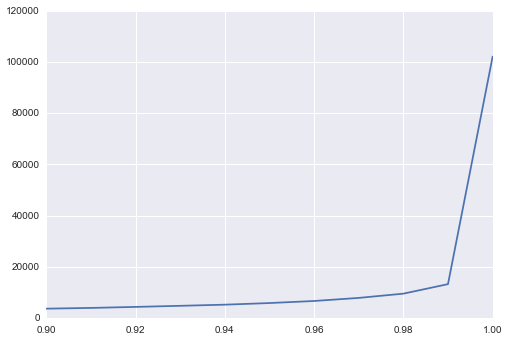

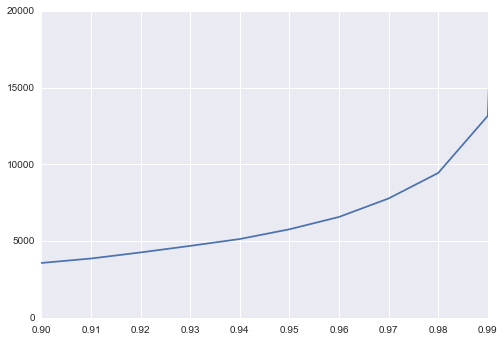

In [18]:
import matplotlib.pyplot as plt
plt.plot(top_end.index, top_end.values) # Accesing index
plt.show()
plt.plot(top_end.index, top_end.values)
plt.axis([0.9, 0.99, 0, 20000])
plt.show() # Now a much better plot

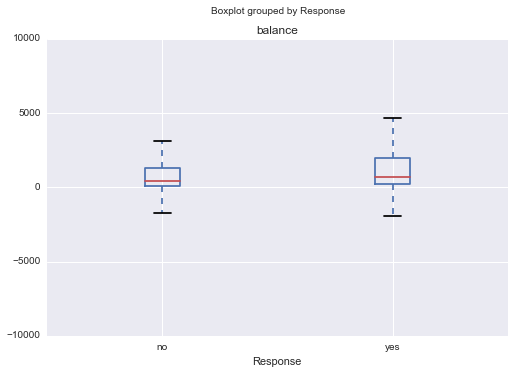

In [30]:
bank_telemarket_df = bank_telemarket_df[bank_telemarket_df.balance <= 13000 ] # Uses broadcasting
plot = bank_telemarket_df.boxplot('balance', 'Response')

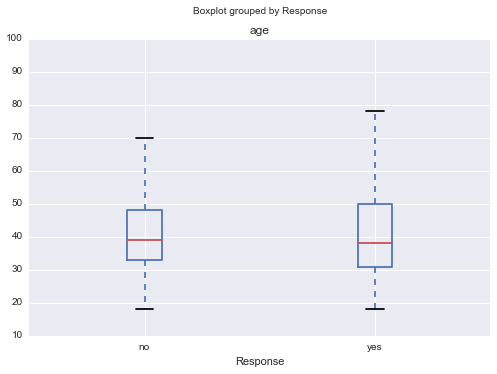

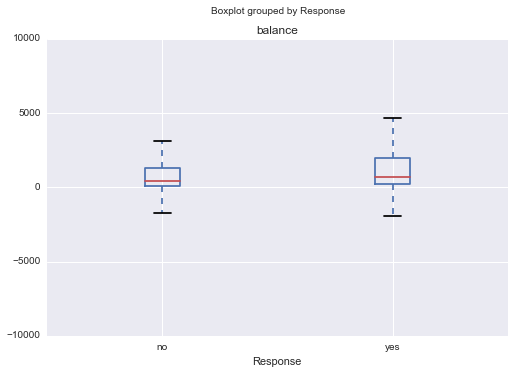

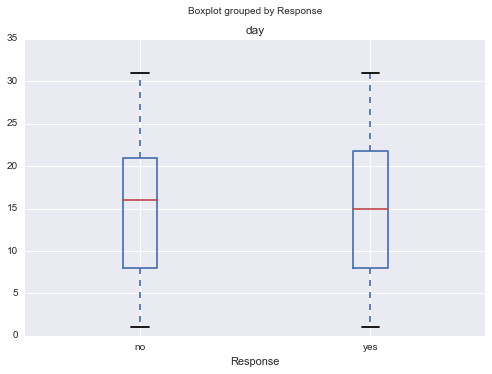

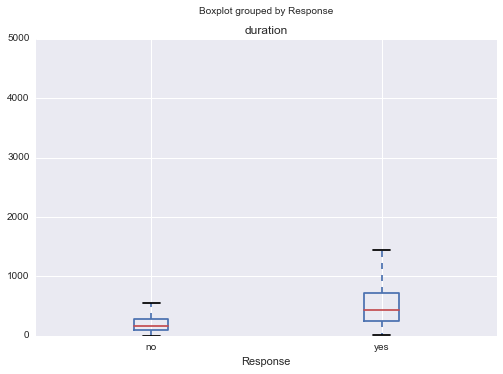

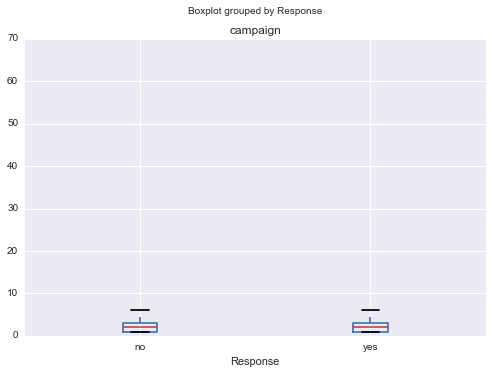

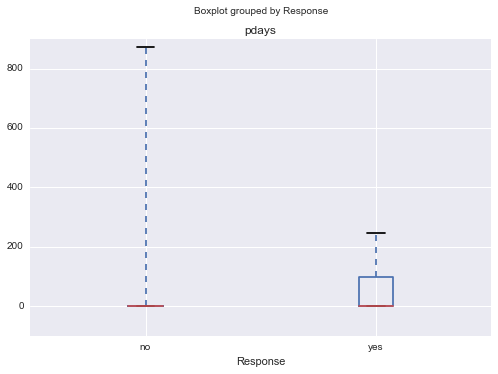

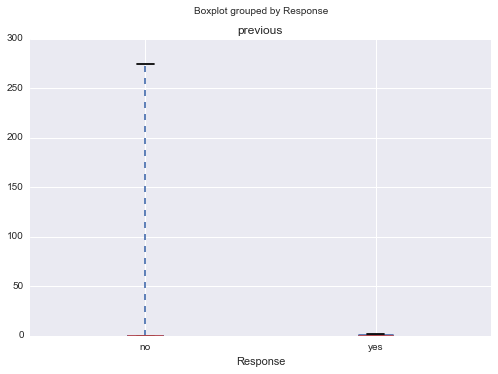

In [46]:
from sklearn.cross_validation import train_test_split
#df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True)

for column, column_type in bank_telemarket_df.dtypes.iteritems():
    #print column, str(column_type)
    if str(column_type)== 'int64':
        plot = bank_telemarket_df.boxplot(column, 'Response')

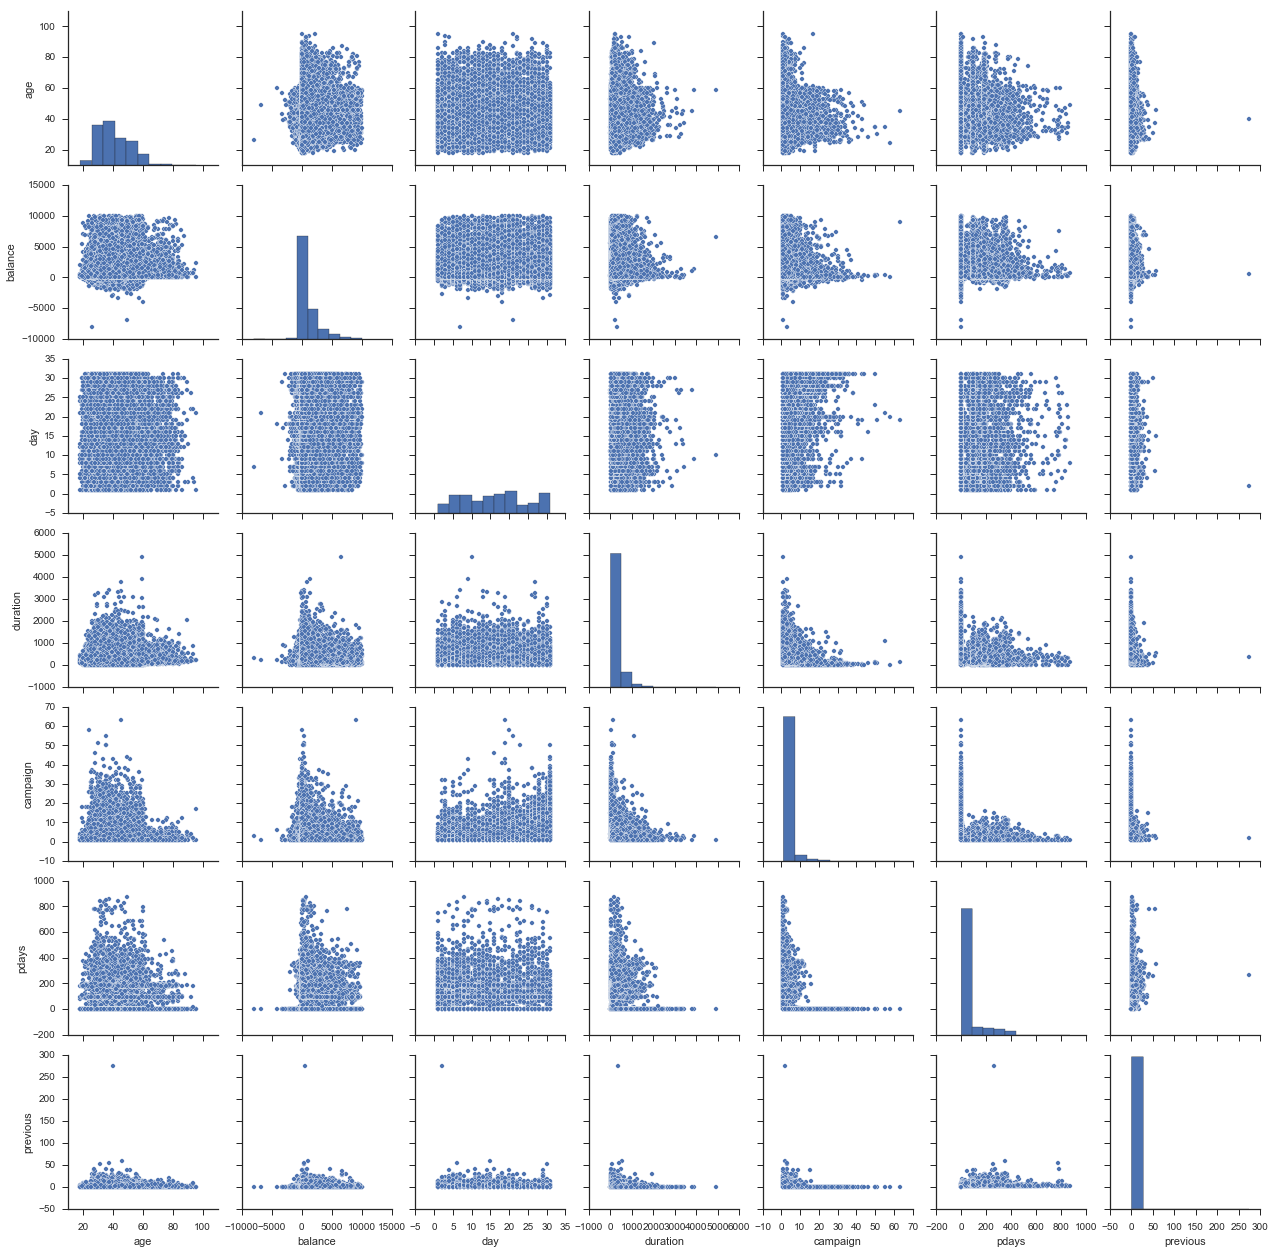

In [63]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns.pairplot(bank_telemarket_df)